In [219]:
import coursework as cw
import numpy as np
from tqdm import tqdm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.sparse import csgraph
import scipy.stats.stats as st
from tqdm import tqdm
from collections import Counter
import math
import networkx as nx
from numpy import linalg as LA
from importlib import reload
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Experiment 1

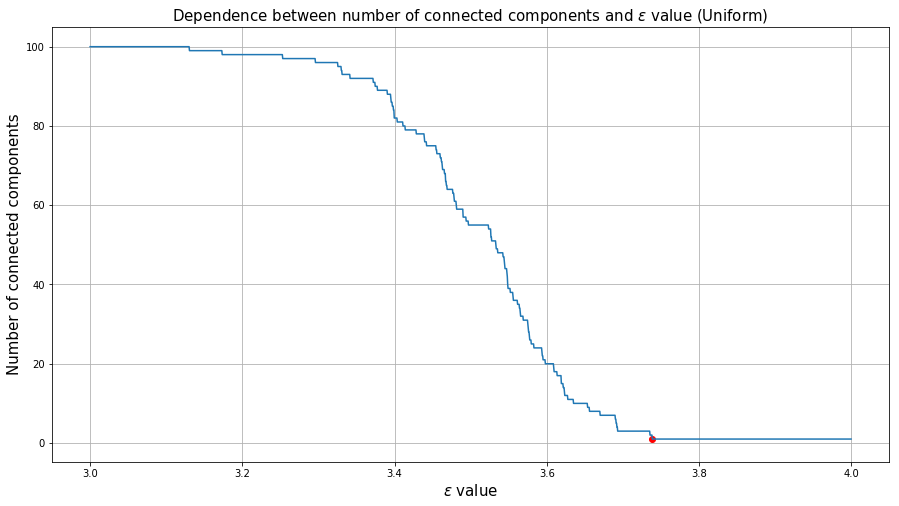

3.7385000000002466

In [831]:
reload(cw)
cw.Exp1(100, 100, 1, 3, 4, 2000, 'Uniform', True, True)

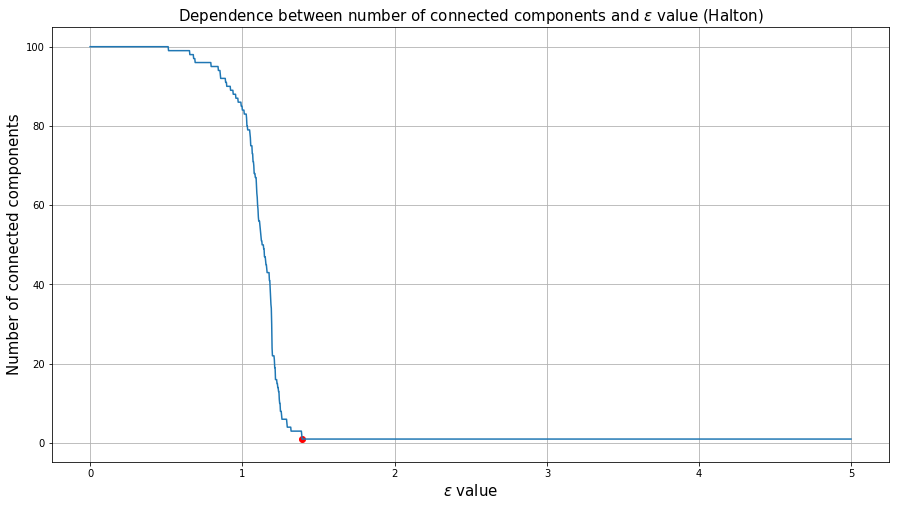

1.3925

In [840]:
reload(cw)
cw.Exp1(100, 100, 1, 0, 5, 2000, 'Halton', True, True)

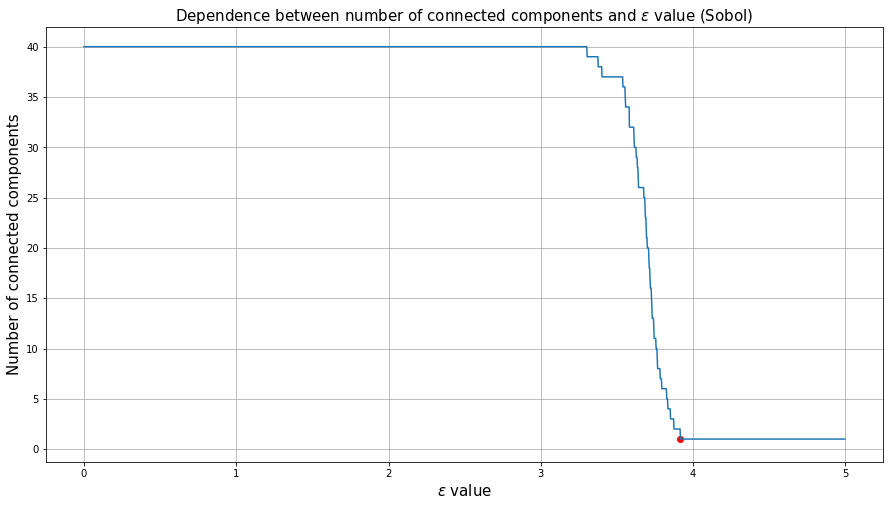

3.9175

In [842]:
reload(cw)
reload(sl)
cw.Exp1(100, 40, 1, 0, 5, 2000, 'Sobol', True, True)

### n = 100, k = 100, a = 1, Uniform

In [752]:
reload(cw)
epsilons = np.array([])

for i in tqdm(range(500)):
    epsilons = np.append(epsilons, (cw.Exp1(100, 100, 1, 3.6, 4, 1000, 'Uniform', False, False)))

epsilons = epsilons[epsilons != None]
mean_uni = np.mean(epsilons)
std_uni = np.std(epsilons)
var_uni = np.var(epsilons)
print('mean_uni =', mean_uni)
print('Standart deviation =', std_uni)
print('Variance =', var_uni)

100%|████████████████████████████████████████| 500/500 [19:49<00:00,  2.38s/it]


mean_uni = 3.8040599999999776
Standart deviation = 0.050410404481609154
Variance = 0.00254120887999944


### n = 200, k = 100, a = 1

In [31]:
reload(cw)
epsilons2 = np.array([])

for i in tqdm(range(500)):
    epsilons2 = np.append(epsilons2, (cw.Exp1(200, 100, 1, 5.4, 5.6, 1000, False, False)))

epsilons2 = epsilons2[epsilons2 != None]
mean2 = np.mean(epsilons2)
std2 = np.std(epsilons2)
var2 = np.var(epsilons2)
print('Mean =', mean2)
print('Standart deviation =', std2)
print('Variance =', var2)

100%|████████████████████████████████████████| 500/500 [19:36<00:00,  2.35s/it]


Mean = 5.497943815513833
Standart deviation = 0.044719947904560055
Variance = 0.0019998737405865653


### n = 200, k = 100, a = 3

In [33]:
reload(cw)
epsilons3 = np.array([])

for i in tqdm(range(500)):
    epsilons3 = np.append(epsilons3, (cw.Exp1(200, 100, 3, 16, 17, 1000, False, False)))
    
epsilons3 = epsilons3[epsilons3 != None]
mean3 = np.mean(epsilons3)
std3 = np.std(epsilons3)
var3 = np.var(epsilons3)
print('Mean =', mean3)
print('Standart deviation =', std3)
print('Variance =', var3)

100%|████████████████████████████████████████| 500/500 [23:44<00:00,  2.85s/it]


Mean = 16.511501002004632
Standart deviation = 0.14055772639005684
Variance = 0.01975647444794208


In [36]:
print('Ratio of mean epsilon value to the length of diagonal:')
print('First set of parameters:', mean / (1 * math.sqrt(100)))
print('Second set of parameters:', mean2 / (1 * math.sqrt(200)))
print('Third set of parameters:', mean3 / (3 * math.sqrt(200)))

Ratio of mean epsilon value to the length of diagonal:
First set of parameters: 0.38022415999999776
Second set of parameters: 0.38876333545324715
Third set of parameters: 0.38917981086953163


# Experiment 2

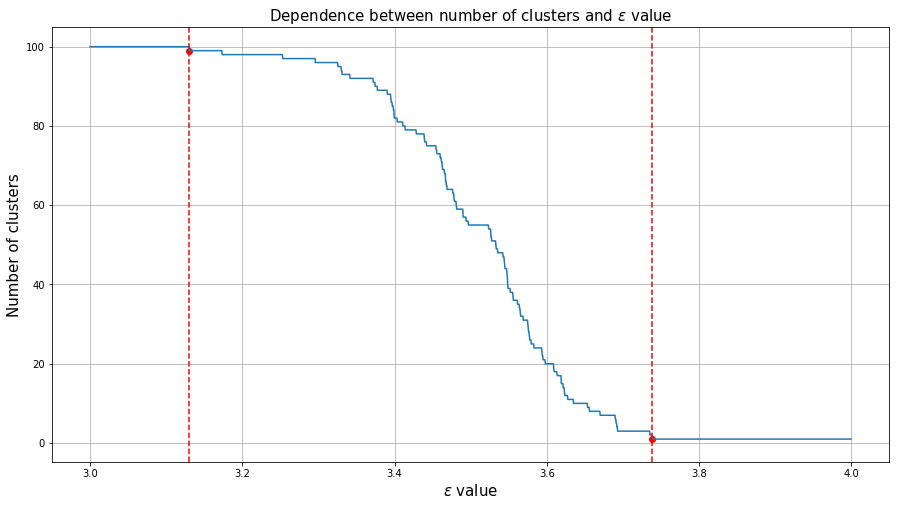

(3.1305000000000436, 3.7385000000002466)

In [299]:
reload(cw)
cw.Exp2(100, 100, 1, 3, 4, 2000, 'Uniform', True, True)

In [50]:
diff_epsilons = np.array([])

for i in tqdm(range(500)):
    tuples = cw.Exp2(100, 100, 1, 3, 4, 1000, False, False)
    diff_epsilons = np.append(diff_epsilons, tuples[1] - tuples[0])
    
diff_epsilons = diff_epsilons[diff_epsilons != None]
mean4 = np.mean(diff_epsilons)
std4 = np.std(diff_epsilons)
var4 = np.var(diff_epsilons)
print('Window width:')
print('Mean =', mean4)
print('Standart deviation =', std4)
print('Variance =', var4)

100%|████████████████████████████████████████| 500/500 [13:58<00:00,  1.68s/it]


Window width:
Mean = 0.6273859999999308
Standart deviation = 0.09285027196512728
Variance = 0.008621173003998102


# Experiment 3

In [52]:
reload(cw)
k_values = np.array([])

for i in tqdm(range(100)):
    for j in range(2,1000):
        if cw.Exp3(100, j, 1, 3.7):
            k_values = np.append(k_values, j)
            break

100%|████████████████████████████████████████| 100/100 [28:55<00:00, 17.36s/it]


In [74]:
mean_val = np.array([])
std_val = np.array([])
var_val = np.array([])

for i in range(500):
    subselection = np.random.choice(k_values, size=50)
    mean_val = np.append(mean_val, np.mean(subselection))
    std_val = np.append(std_val, np.std(subselection))
    var_val = np.append(var_val, np.var(subselection))

k_mean = np.mean(mean_val)
k_std = np.mean(std_val)
k_var = np.mean(var_val)

print('K value:')
print('Bootstrap mean:', k_mean)
print('Bootstrap standart deviation:', k_std)
print('Bootstrap variance:', k_var)

K value:
Bootstrap mean: 120.70576000000001
Bootstrap standart deviation: 55.68512548121798
Bootstrap variance: 3134.5820752


# Experiment 4

In [75]:
reload(cw)
first = np.array([]) 
second = np.array([])
all_eigenvalues = np.array([])
nomax_eigenvalues = np.array([])

for i in tqdm(range(500)):
    new_matrix = cw.Exp4(100, 100, 1, 3.6, 4, 1000)
    eigenvalues = np.linalg.eigvals(new_matrix)
    eigenvalues = np.sort(eigenvalues)
    all_eigenvalues = np.append(all_eigenvalues, eigenvalues)
    first = np.append(first, eigenvalues[-1])
    second = np.append(second, eigenvalues[-2])
    eigenvalues = eigenvalues[:-1]
    nomax_eigenvalues = np.append(nomax_eigenvalues, eigenvalues)

100%|████████████████████████████████████████| 500/500 [07:59<00:00,  1.04it/s]


In [77]:
first_mean = np.mean(first)
first_std = np.std(first)
first_var = np.var(first)

second_mean = np.mean(second)
second_std = np.std(second)
second_var = np.var(second)

print('First eigenvalue mean:', first_mean)
print('First eigenvalue std:', first_std)
print('First eigenvalue var:', first_var)
print('\n')
print('Second eigenvalue mean:', second_mean)
print('Second eigenvalue std:', second_std)
print('Second eigenvalue var:', second_var)

First eigenvalue mean: 19.452704832443136
First eigenvalue std: 4.92139183638205
First eigenvalue var: 24.22009760720788


Second eigenvalue mean: 8.350182564800106
Second eigenvalue std: 0.8723509795000134
Second eigenvalue var: 0.7609962314346328


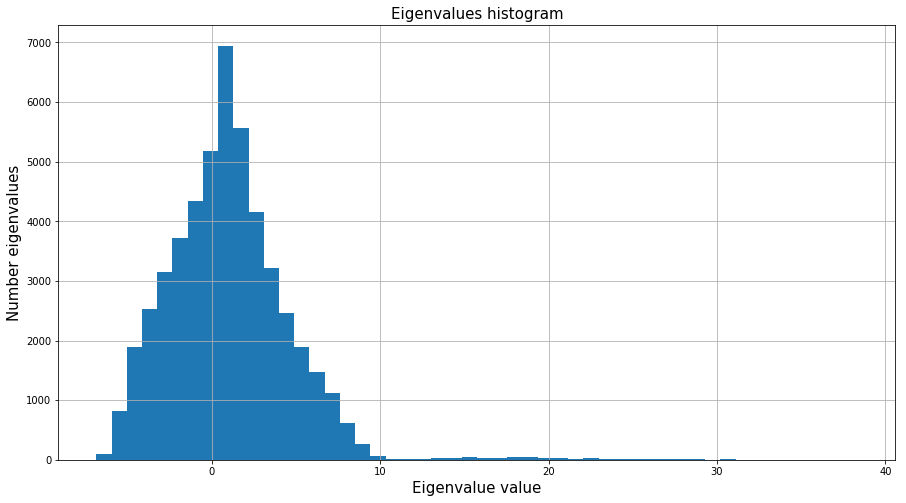

In [84]:
fig = plt.figure(figsize=(15, 8))

plt.hist(all_eigenvalues, bins=50)
plt.title('Eigenvalues histogram', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_1.pdf')
pp.savefig(fig)
pp.close()

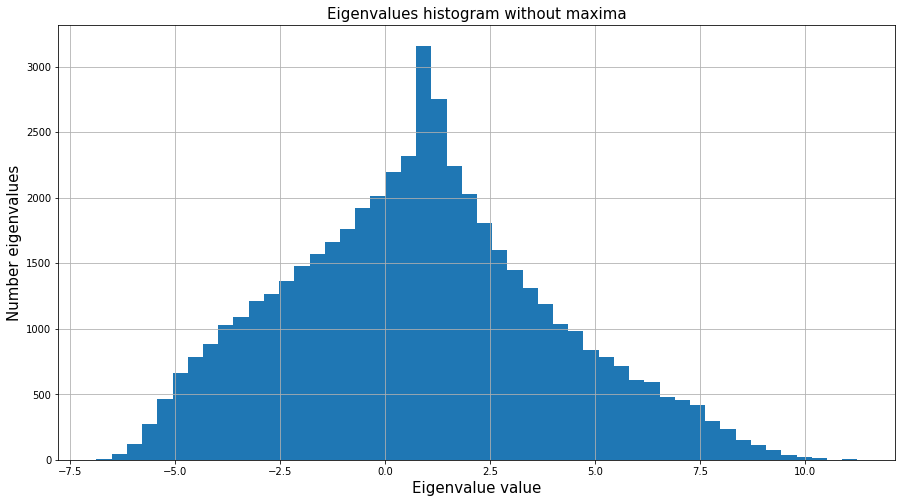

In [85]:
fig = plt.figure(figsize=(15, 8))

plt.hist(nomax_eigenvalues, bins=50)
plt.title('Eigenvalues histogram without maxima', size=15)
plt.ylabel('Number eigenvalues', size=15)
plt.xlabel('Eigenvalue value', size=15)
plt.grid()
plt.show()
pp = PdfPages('CWExp4_2.pdf')
pp.savefig(fig)
pp.close()

# Experiment 5

In [3]:
reload(cw)
Bettis = np.array([])

for i in tqdm(range(500)):
    Bettis = np.append(Bettis, (cw.Exp5(100, 100, 1, 3.6, 4, 1000)))

100%|████████████████████████████████████████| 500/500 [18:54<00:00,  2.27s/it]


In [4]:
Bettis_none = Bettis[Bettis != None]
mean6 = np.mean(Bettis_none)
std6 = np.std(Bettis_none)
var6 = np.var(Bettis_none)
print('Betti Mean =', mean6)
print('Betti Standart deviation =', std6)
print('Betti Variance =', var6)

Betti Mean = 1774.59
Betti Standart deviation = 141.52590540250924
Betti Variance = 20029.581899999997


# Experiment 6

100%|██████████████████████████████████████████| 20/20 [06:30<00:00, 19.55s/it]


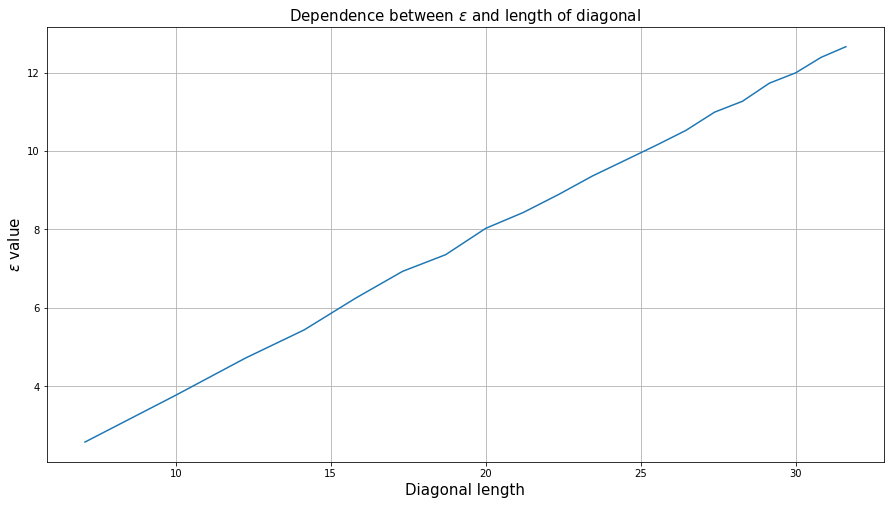

In [16]:
reload(cw)
n_values = np.arange(50,1050,50)
diag_values = np.sqrt(n_values)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, 1*n/100, 20*n/100, 2000, False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(diag_values, eps_values)
plt.title('Dependence between $\epsilon$ and length of diagonal', size=15)
plt.xlabel('Diagonal length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp61.pdf')
pp.savefig(fig)
pp.close()

100%|██████████████████████████████████████████| 20/20 [02:03<00:00,  6.19s/it]


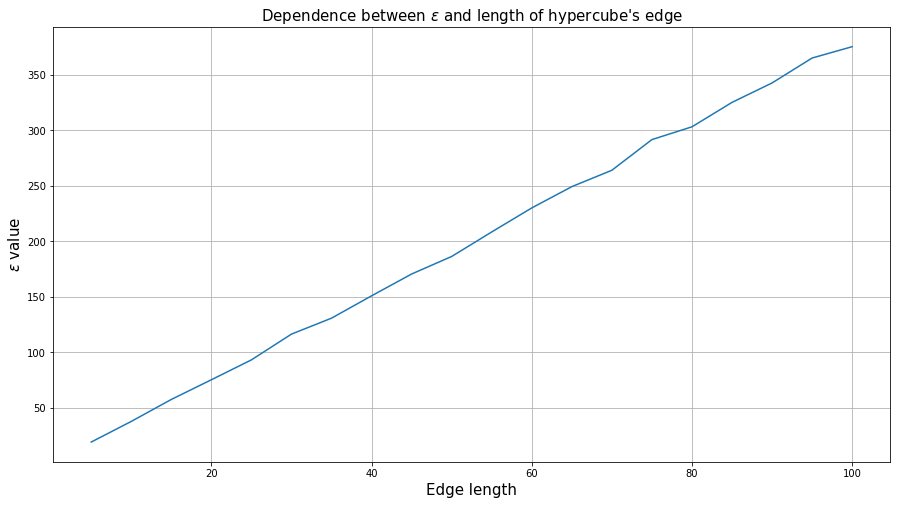

In [14]:
reload(cw)
a_values = np.arange(5,105,5)

eps_values = np.array([])

for a in tqdm(a_values):
    test = cw.Exp1(100, 100, a, 1*a, 10*a, 1000, False, False)
    eps_values = np.append(eps_values, test)

fig = plt.figure(figsize=(15,8))
plt.plot(a_values, eps_values)
plt.title("Dependence between $\epsilon$ and length of hypercube's edge", size=15)
plt.xlabel('Edge length', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp62.pdf')
pp.savefig(fig)
pp.close()

100%|██████████████████████████████████████████| 40/40 [06:08<00:00,  9.21s/it]


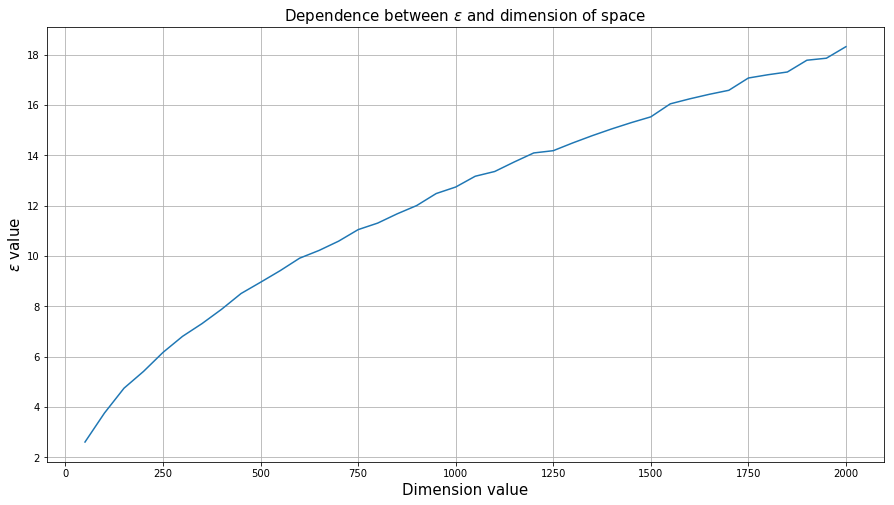

In [15]:
reload(cw)
n_values = np.arange(50, 2050, 50)

eps_values = np.array([])

for n in tqdm(n_values):
    eps_values = np.append(eps_values, cw.Exp1(n, 100, 1, 0.1*n/100, 20*n/100, 1000, False, False))

fig = plt.figure(figsize=(15,8))
plt.plot(n_values, eps_values)
plt.title('Dependence between $\epsilon$ and dimension of space', size=15)
plt.xlabel('Dimension value', size=15)
plt.ylabel('$\epsilon$ value', size=15)
plt.legend()
plt.grid()
plt.show()
pp = PdfPages('CWExp63.pdf')
pp.savefig(fig)
pp.close()

# Experiment 7


In [133]:
def takeDegree(elem):
    return elem[1]

def degrees(G):
    ND = list(G.degree()) 
    D = []
    for i in range(len(ND)):
        D.append(takeDegree(ND[i]))
    return D

In [136]:
degree = []

for _ in tqdm(range(500)):
    new_matrix = cw.Exp4(100, 100, 1, 3.6, 4, 1000)
    if type(new_matrix) != type(None):
        graph = nx.from_numpy_matrix(new_matrix)
        degree.extend(degrees(graph))

100%|████████████████████████████████████████| 500/500 [09:39<00:00,  1.16s/it]


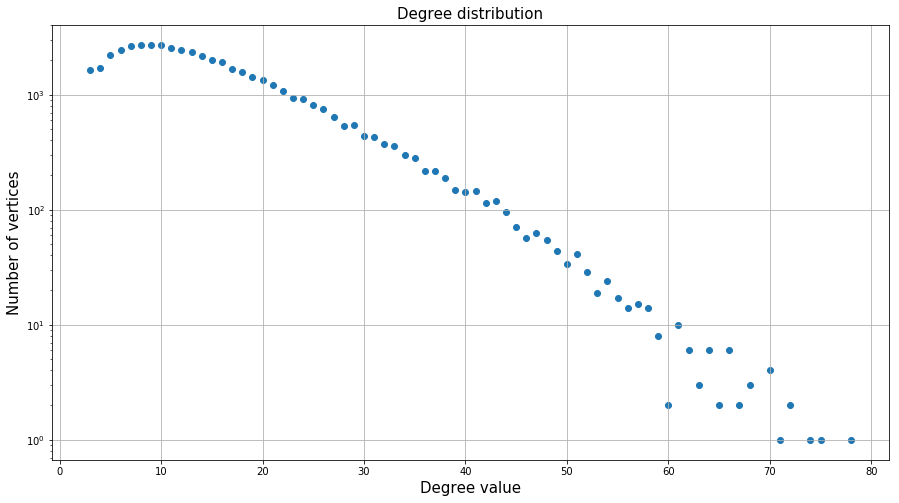

In [141]:
vertex_dict = Counter(degree)
vertex_dict = dict(vertex_dict)
vertex_pairs = vertex_dict.items()
vertex_list = np.array(list(vertex_pairs))

fig = plt.figure(figsize=(15, 8))
plt.scatter(vertex_list[:,0],vertex_list[:,1])
plt.yscale('log')
plt.title('Degree distribution', size=15)
plt.xlabel('Degree value', size=15)
plt.ylabel('Number of vertices', size=15)
plt.grid()
pp = PdfPages('CWExp7.pdf')
pp.savefig(fig)
pp.close()

In [144]:
import sobol_seq
vec, seed = sobol_seq.i4_sobol(2, 1)

In [146]:
import halton as ht

In [200]:
ht.halton(2,10)

array([[0.5       , 0.33333333],
       [0.25      , 0.66666667],
       [0.75      , 0.11111111],
       [0.125     , 0.44444444],
       [0.625     , 0.77777778],
       [0.375     , 0.22222222],
       [0.875     , 0.55555556],
       [0.0625    , 0.88888889],
       [0.5625    , 0.03703704],
       [0.3125    , 0.37037037]])

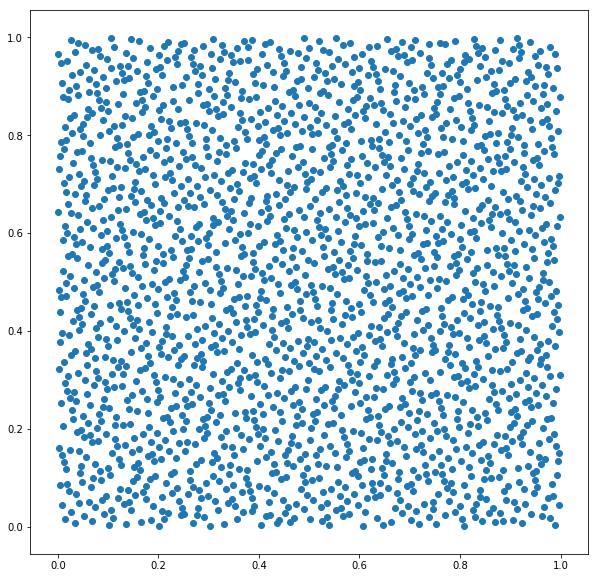

In [208]:
arr = ht.halton(2,2000)
plt.figure(figsize=(10,10))
plt.scatter(arr[:,0],arr[:,1])

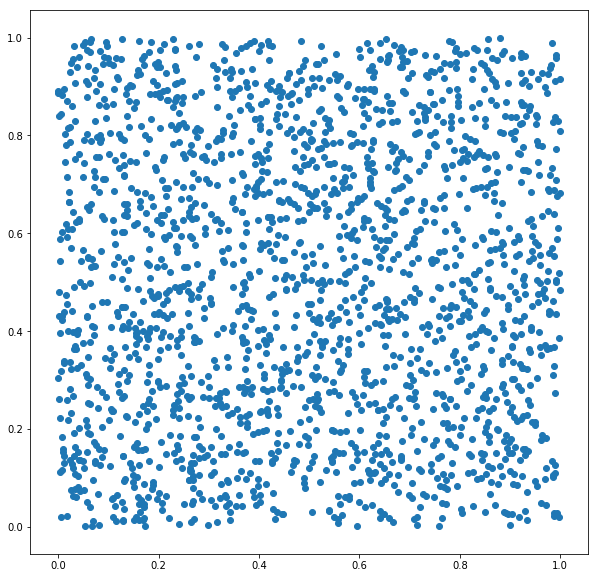

In [207]:
arr2 = cw.DotsCoordinates(2,2000,1)
plt.figure(figsize=(10,10))
plt.scatter(arr2[:,0],arr2[:,1])

In [241]:
import sobol

In [262]:
from sobol import i4_sobol_generate
plt.figure(figsize=(10,10))
for i in range(300,800):
    plt.scatter(i4_sobol(2,i)[0][0], i4_sobol(2,i)[0][1])

ImportError: cannot import name 'i4_sobol_generate'

In [274]:
import sobol_lib as sl

In [295]:
reload(sl)
arr3=sl.i4_sobol_generate(2,100,5)

In [296]:
sl.i4_sobol_generate(2,10,1)

array([[0.    , 0.5   , 0.75  , 0.25  , 0.375 , 0.875 , 0.625 , 0.125 ,
        0.1875, 0.6875],
       [0.    , 0.5   , 0.25  , 0.75  , 0.375 , 0.875 , 0.125 , 0.625 ,
        0.3125, 0.8125]])

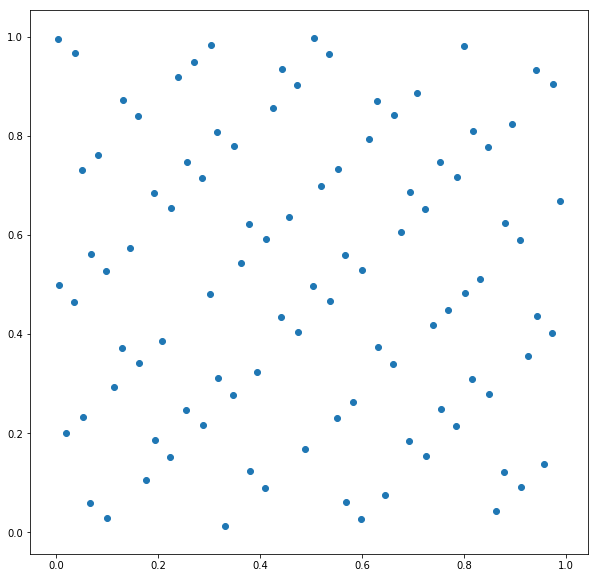

In [320]:
plt.figure(figsize=(10,10))
plt.scatter(arr3[0],arr3[1])

In [762]:
i = np.random.randint(1,1000, size=1)[0]
k = 100
if n > 40:
    div = n // 40
    mod = n % 40
    arr3 = sl.i4_sobol_generate(40, k, i)

    for j in range(div-1):
        #i = np.random.randint(1,1000, size=1)[0]
        new = sl.i4_sobol_generate(40, k, i+40*j+1)
        arr3 = np.vstack((arr3, new))

    i = np.random.randint(1,1000, size=1)[0]
    new = sl.i4_sobol_generate(mod, k, i)
    arr3 = np.vstack((arr3, new))
else:
    result = sl.i4_sobol_generate(n,k, i)

In [763]:
arr3.shape

(100, 100)

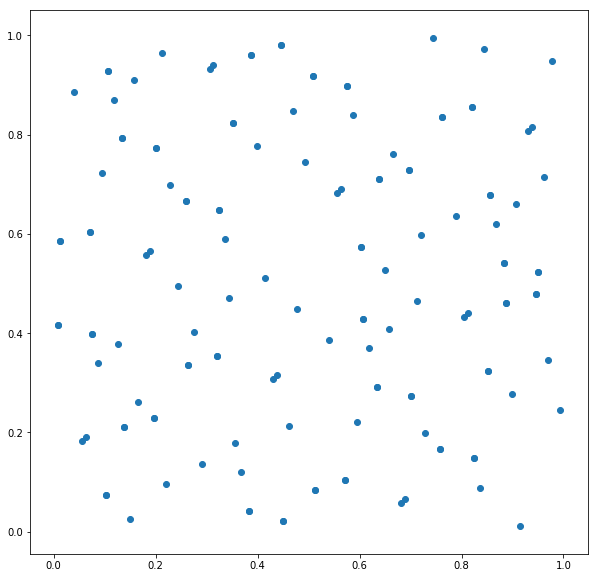

In [757]:
plt.figure(figsize=(10,10))
plt.scatter(arr3[0],arr3[1])

In [758]:
temp = sl.i4_sobol_generate(2, 100, 0)
temp.shape


(2, 100)

In [741]:
n = 100
k = 2
coords = np.array([])

for i in range (n * k):
    j = np.random.randint(1, 1000, size=1)[0]
    coords = np.append(coords, sl.i4_sobol(1, j+i)[0])

In [742]:
coords = np.reshape(coords, (k,n))

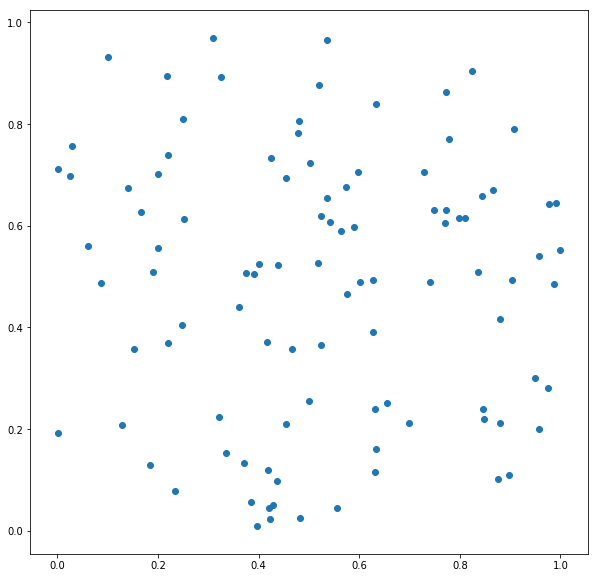

In [743]:
plt.figure(figsize=(10,10))
plt.scatter(coords[0],coords[1])

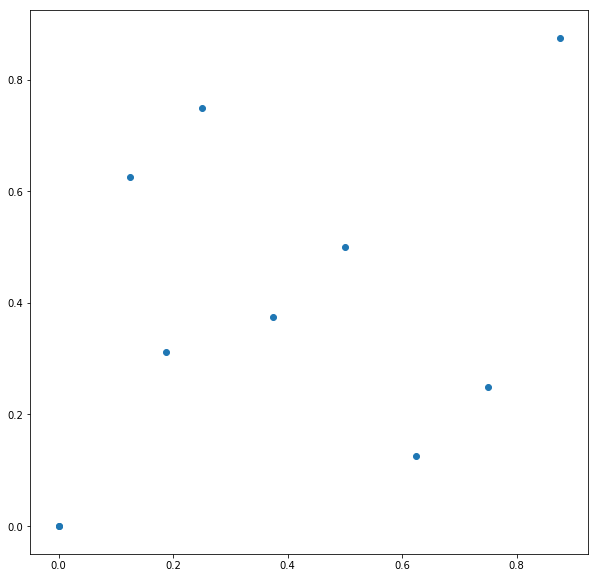

In [683]:
a=sl.i4_sobol_generate(2,10,0)
plt.figure(figsize=(10,10))
plt.scatter(a[0],a[1])

In [726]:
a1 = sl.i4_sobol_generate(1,256,100)
a2 = sl.i4_sobol_generate(1,256,300)
a = sl.i4_sobol_generate(2,256,0)

In [722]:
a1

array([[0.2890625 , 0.4140625 , 0.9140625 , 0.6640625 , 0.1640625 ,
        0.2265625 , 0.7265625 , 0.9765625 , 0.4765625 , 0.3515625 ,
        0.8515625 , 0.6015625 , 0.1015625 , 0.0703125 , 0.5703125 ,
        0.8203125 , 0.3203125 , 0.4453125 , 0.9453125 , 0.6953125 ,
        0.1953125 , 0.1328125 , 0.6328125 , 0.8828125 , 0.3828125 ,
        0.2578125 , 0.7578125 , 0.5078125 , 0.0078125 , 0.01171875,
        0.51171875, 0.76171875, 0.26171875, 0.38671875, 0.88671875,
        0.63671875, 0.13671875, 0.19921875, 0.69921875, 0.94921875,
        0.44921875, 0.32421875, 0.82421875, 0.57421875, 0.07421875,
        0.10546875, 0.60546875, 0.85546875, 0.35546875, 0.48046875,
        0.98046875, 0.73046875, 0.23046875, 0.16796875, 0.66796875,
        0.91796875, 0.41796875, 0.29296875, 0.79296875, 0.54296875,
        0.04296875, 0.05859375, 0.55859375, 0.80859375, 0.30859375,
        0.43359375, 0.93359375, 0.68359375, 0.18359375, 0.24609375,
        0.74609375, 0.99609375, 0.49609375, 0.37

In [723]:
a2

array([[0.49023438, 0.36523438, 0.86523438, 0.61523438, 0.11523438,
        0.08398438, 0.58398438, 0.83398438, 0.33398438, 0.45898438,
        0.95898438, 0.70898438, 0.20898438, 0.14648438, 0.64648438,
        0.89648438, 0.39648438, 0.27148438, 0.77148438, 0.52148438,
        0.02148438, 0.02929688, 0.52929688, 0.77929688, 0.27929688,
        0.40429688, 0.90429688, 0.65429688, 0.15429688, 0.21679688,
        0.71679688, 0.96679688, 0.46679688, 0.34179688, 0.84179688,
        0.59179688, 0.09179688, 0.12304688, 0.62304688, 0.87304688,
        0.37304688, 0.49804688, 0.99804688, 0.74804688, 0.24804688,
        0.18554688, 0.68554688, 0.93554688, 0.43554688, 0.31054688,
        0.81054688, 0.56054688, 0.06054688, 0.04492188, 0.54492188,
        0.79492188, 0.29492188, 0.41992188, 0.91992188, 0.66992188,
        0.16992188, 0.23242188, 0.73242188, 0.98242188, 0.48242188,
        0.35742188, 0.85742188, 0.60742188, 0.10742188, 0.07617188,
        0.57617188, 0.82617188, 0.32617188, 0.45

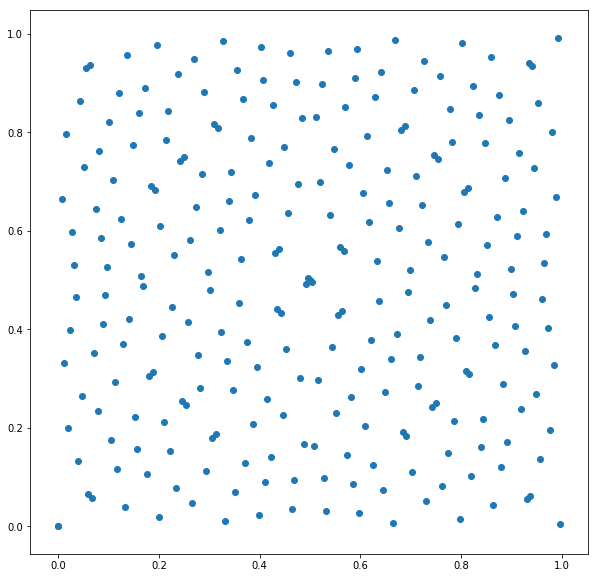

In [727]:

plt.figure(figsize=(10,10))
plt.scatter(a[0],a[1])

In [836]:
reload(cw)
test1 = cw.DotsCoordinates(2,5,1,'Uniform')
test2 = cw.DotsCoordinates(2,5,1,'Halton')
test3 = cw.DotsCoordinates(2,5,1,'Sobol')

In [837]:
test1

array([[0.59768158, 0.6759869 ],
       [0.29928174, 0.73074027],
       [0.57873939, 0.80901767],
       [0.1672485 , 0.31214497],
       [0.35793155, 0.4917473 ]])

In [838]:
test2

array([[0.5       , 0.33333333],
       [0.25      , 0.66666667],
       [0.75      , 0.11111111],
       [0.125     , 0.44444444],
       [0.625     , 0.77777778]])

In [839]:
test3

array([[0.12304688, 0.38085938],
       [0.62304688, 0.88085938],
       [0.87304688, 0.13085938],
       [0.37304688, 0.63085938],
       [0.49804688, 0.00585938]])